In [1]:
from PyBayesAB.distribution import bernoulli, poisson, normal, multinomial
import numpy as np
import matplotlib.pyplot as plt


# Bernoulli 

In [2]:

# Create data type = Bernoulli object
Bern_test = bernoulli.BaysBernoulli()

# create data for two groups
p_A = 0.21
p_B = 0.2
for n in range(20):
    n_trial = np.random.randint(10,50)
    Bern_test.add_rand_experiment(n_trial, p_A, group="A")
    Bern_test.add_rand_experiment(n_trial, p_B, group="B")


Bayesian metrics summary: 

Probablity that A is better than B = 21.42% 

There is 95% that the difference in Bernoulli probability is between -0.05 and 0.03 

The MAP (maximum a posterior estimate) if -0.02 

Probability that the difference is within the ROPE (region of practical equivalence) is 23.2% 

ROPE-based decision: Inconclusive: needs more data (overlaps with ROPE)  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -0.01 and 0.01
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 1.02, thus providing anecdotal evidence for the alternative
                




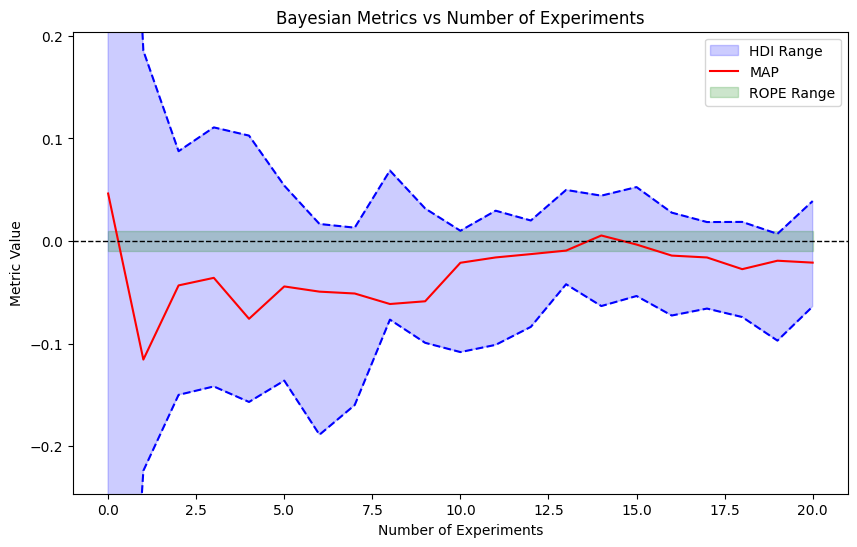

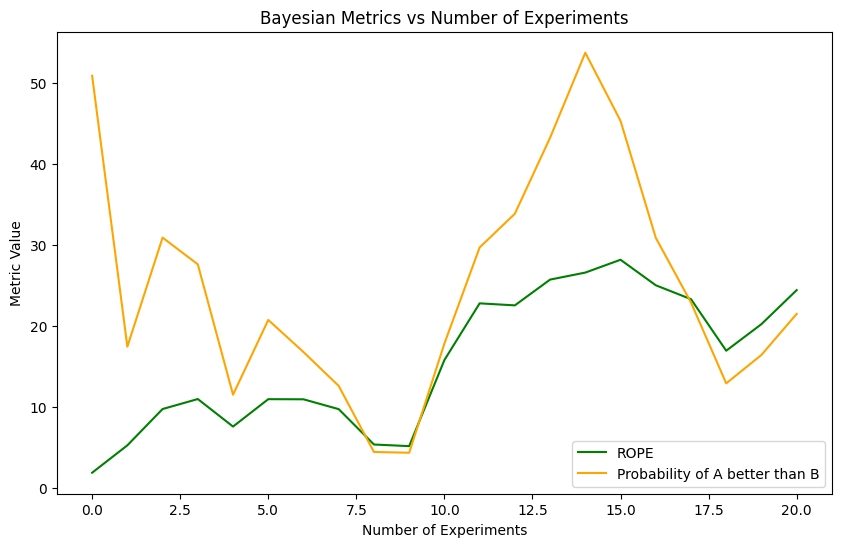

In [3]:
# calculate some Bayesian metrics

ROPE = [-0.01, 0.01]  # Region of Practical Equivalence

print(Bern_test.summary_result(rope_interval=ROPE,level=95))

_, _ = Bern_test.plot_bayesian_metrics(rope_interval=ROPE)

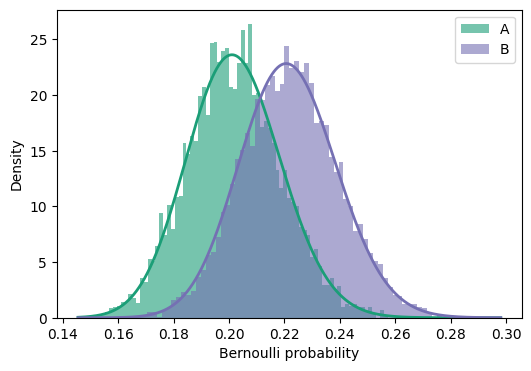

In [4]:
# plot posterior of the difference in p
Bern_test.plot_final_posterior(group="AB")

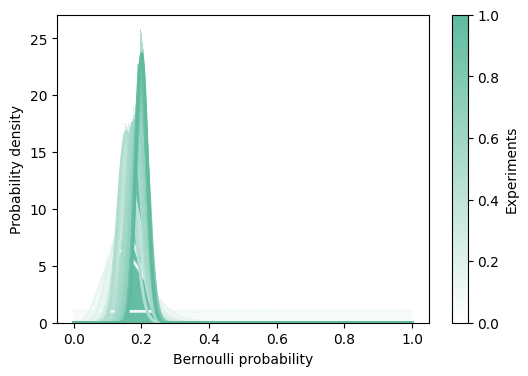

In [5]:
# plot cumulative (updated) posterior of the difference in p
Bern_test.plot_cum_posterior(group="A", type="1D")

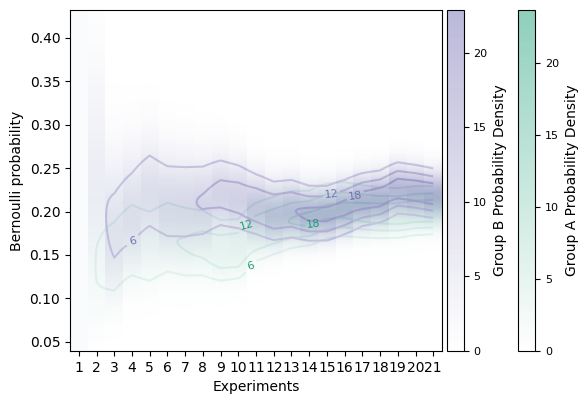

In [6]:
# Plot cumulative (updated) posterior for both groups as heatmap
Bern_test.plot_cum_posterior(group="AB", type="2D")

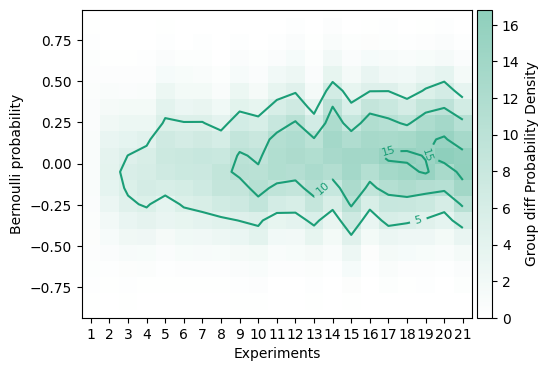

In [7]:
# Plot cumulative (updated) posterior for the difference as heatmap
Bern_test.plot_cum_posterior(group="diff", type="2D")

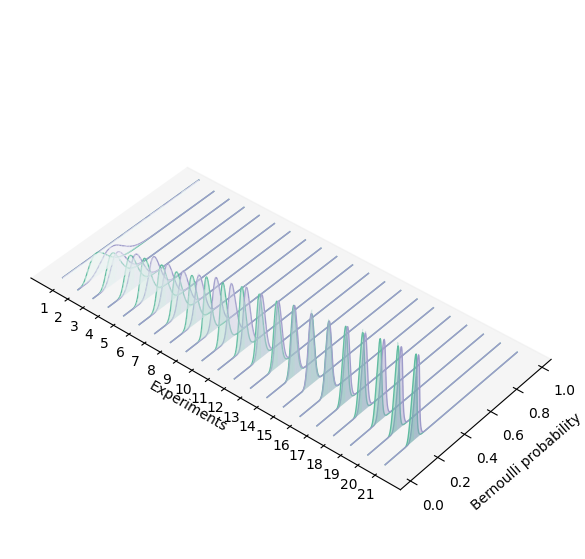

In [8]:
Bern_test.plot_cum_posterior(group="AB", type="3D")

In [9]:
# Plot animation for both groups
anim = Bern_test.plot_anim(group="AB")
anim

# Poisson

In [10]:
from PyBayesAB.distribution import poisson

# Create Likelihhod = Poisson object
Pois_test = poisson.BaysPoisson()

# create data
mu_A = 20
mu_B = 21
n_exp = 20
for next in range(n_exp):
    n_events = np.random.randint(5, 10)
    # add random experiment for group A and B
    Pois_test.add_rand_experiment(n_events, mu_A)
    Pois_test.add_rand_experiment(n_events, mu_B, group="B")

Bayesian metrics summary: 

Probablity that A is better than B = 0.00% 

There is 95% that the difference in Poisson mean is between -3.65 and -1.73 

The MAP (maximum a posterior estimate) if -2.01 

Probability that the difference is within the ROPE (region of practical equivalence) is 49.1% 

ROPE-based decision: Statistically Significant: Group A is better  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -2.00 and 2.00
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 1.96, thus providing anecdotal evidence for the alternative
                




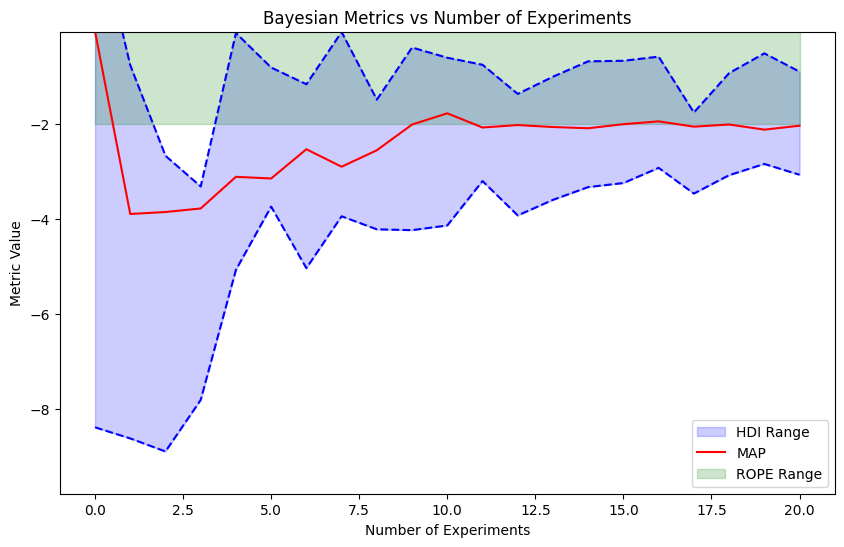

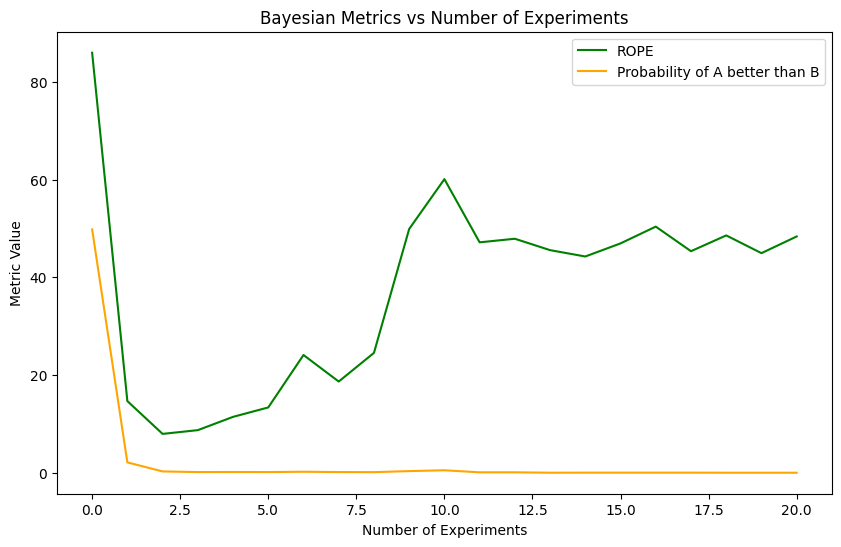

In [11]:
# calculate some Bayesian metrics

ROPE = [-2, 2]  # Region of Practical Equivalence

print(Pois_test.summary_result(rope_interval=ROPE,level=95))

_, _ = Pois_test.plot_bayesian_metrics(rope_interval=ROPE)

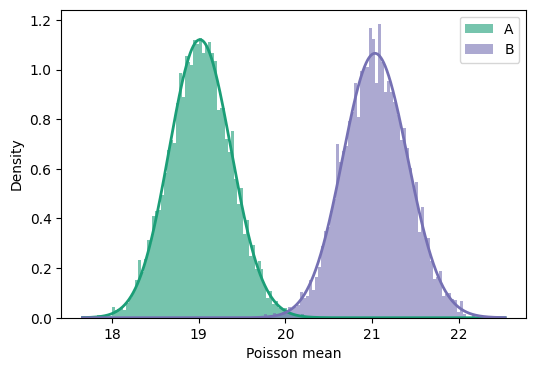

In [12]:
# Final posterior difference in Poisson mean
Pois_test.plot_final_posterior(group="AB")


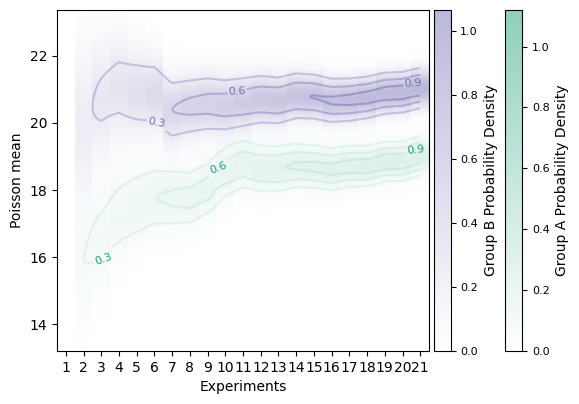

In [13]:
Pois_test.plot_cum_posterior(group="AB", type="2D")


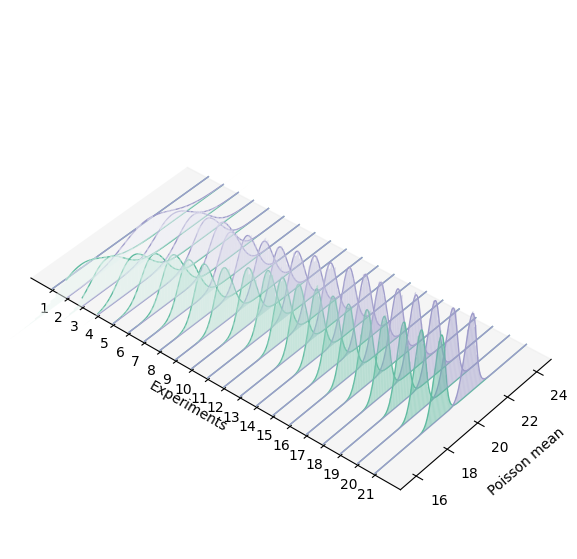

In [14]:
Pois_test.plot_cum_posterior(group="AB", type="3D", para_range=[15, 25])

In [16]:
# animation
anim = Pois_test.plot_anim(group="B",  para_range=[10,25])
anim

# Normal

## Normal  with unkown mean and std

In [17]:
from PyBayesAB.distribution import normal
import numpy as np

mu_A = 20
std_A = 10
tau_A = 1/std_A**2 
mu_B = 22
std_B = 12
tau_B = 1/std_B**2
normal = normal.BaysNorm()
n_exp = 20
for i in range(n_exp):
    n_data = np.random.randint(10,50)
    normal.add_rand_experiment(n_data, mu_A, std_A, group="A")
    normal.add_rand_experiment(n_data, mu_B, std_B, group="B")

In [2]:
from scipy.stats import multinomial
multinomial.rvs(n=10, p=[0.2, 0.3, 0.5], size=1)

array([[0, 4, 6]], dtype=int32)

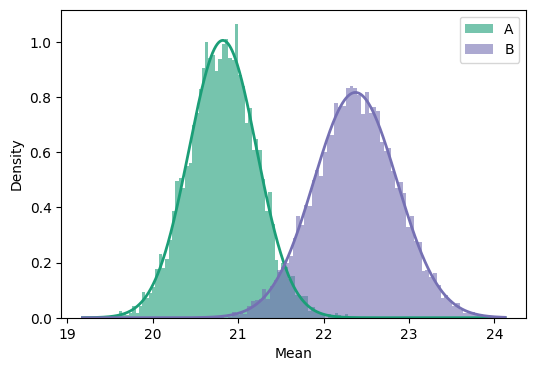

In [18]:
normal.plot_final_posterior(group="AB")

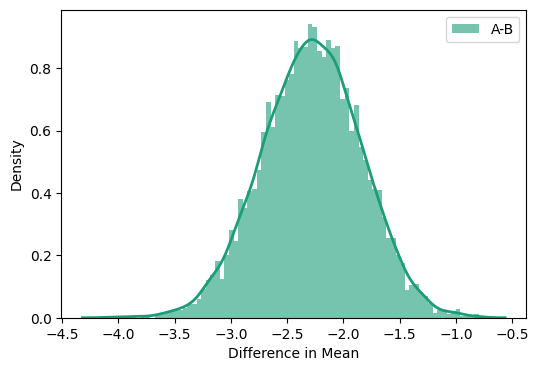

In [19]:
normal.plot_final_posterior(group="diff", post_kwargs={"var":"std"})

Bayesian metrics summary: 

Probablity that A is better than B = 0.67% 

There is 95% that the difference in Mean is between -3.32 and -0.67 

The MAP (maximum a posterior estimate) if -1.56 

Probability that the difference is within the ROPE (region of practical equivalence) is 19.0% 

ROPE-based decision: Statistically Significant: Group A is better  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -1.00 and 1.00
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 1.23, thus providing anecdotal evidence for the alternative
                




(<Figure size 1000x600 with 1 Axes>, <Figure size 1000x600 with 1 Axes>)

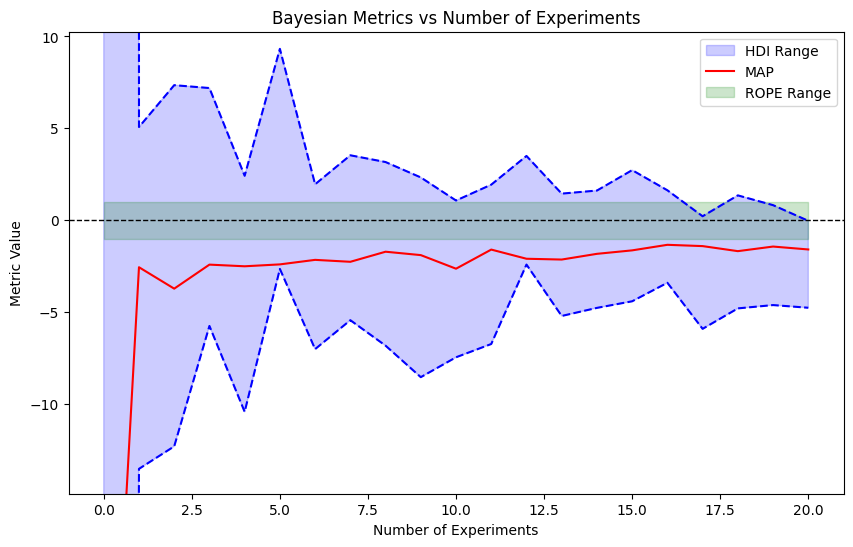

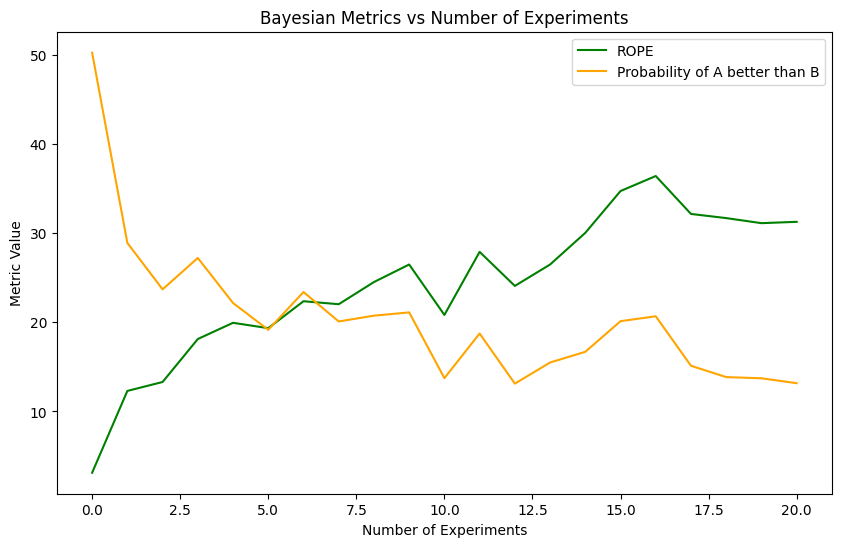

In [20]:
# calculate some Bayesian metrics

ROPE = [-1, 1]  # Region of Practical Equivalence
print(normal.summary_result(rope_interval=ROPE,level=95))

normal.plot_bayesian_metrics(rope_interval=ROPE)

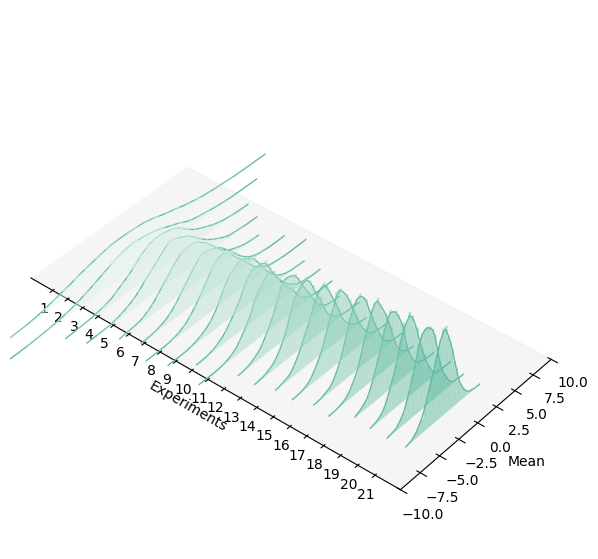

In [25]:
normal.plot_cum_posterior(group="diff", type="3D",  para_range=[-10,10])

In [22]:
# animation
anim = normal.plot_anim(group="diff")
anim

# Multinomial

In [2]:
# generate  random multinomial data

# Create data type = Bernoulli object
Multi_test = multinomial.BaysMultinomial(prior=np.ones(3))

# create data for two groups
p_A = [0.1, 0.2,  0.7]
p_B = [0.2, 0.5, 0.3]
for n in range(20):
    n_trial = np.random.randint(10,50)
    Multi_test.add_rand_experiment(n_trial, p_A, group="A")
    Multi_test.add_rand_experiment(n_trial, p_B, group="B")

In [3]:
Multi_test.make_cum_posterior()

c:\Users\milai\Codes\PyBayesAB\.venv\Lib\site-packages\numpy\_core\function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\milai\Codes\PyBayesAB\.venv\Lib\site-packages\numpy\_core\function_base.py:179: RuntimeWarning: invalid value encountered in add
  y += start


ValueError: The input vector 'x' must lie within the normal simplex. but np.sum(x, 0) = [nan nan nan ... nan nan  3.].